# Predicting Yearly Amount Spent by Customers

## Problem Statement
The aim of this project is to build a predictive model to estimate the yearly amount spent by customers using various features available in the dataset. By understanding and predicting customer spending, businesses can make informed decisions to enhance customer experience and optimize marketing strategies.


## Project Overview
In this project, we will:
1. Load and explore the dataset.
2. Perform exploratory data analysis (EDA) using visualizations to understand relationships between features.
3. Split the data into training and testing sets.
4. Build a Linear Regression model.
5. Evaluate the model's performance.
6. Analyze residuals to validate the model assumptions.

## Expected Outcome
By the end of this project, we will have a predictive model that can estimate the yearly amount spent by customers based on the given features. We will also gain insights into which features are the most significant predictors of customer spending.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from utils import *
%matplotlib inline
import pandas as pd
import seaborn as sns

### Load and Explore the Dataset
We begin by loading the dataset and performing initial exploration to understand its structure and content.

In [10]:
df = pd.read_csv("dataset")

In [12]:
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [14]:
print ('The shape of dataset is:', df.shape)

The shape of dataset is: (500, 8)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [16]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [20]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Exploratory Data Analysis (EDA)
Next, we perform EDA to visualize the relationships between different features and the target variable.

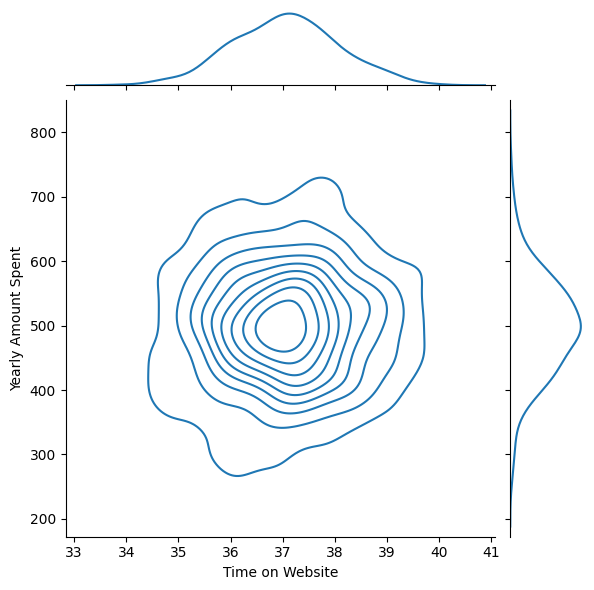

In [22]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, kind = "kde")

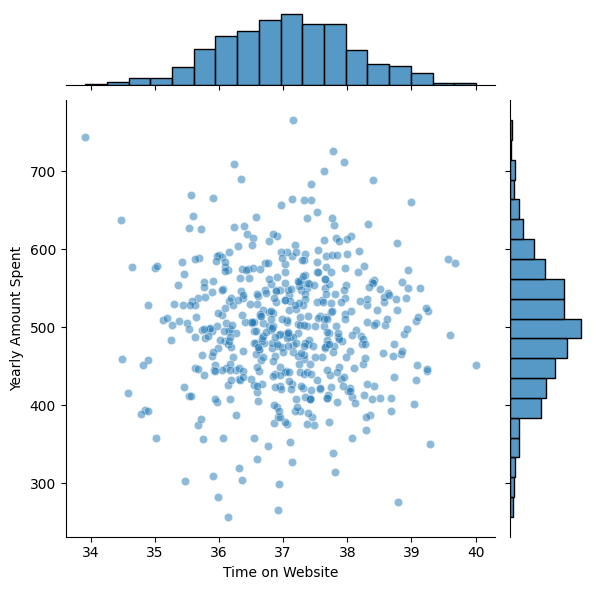

In [28]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, alpha = 0.5)

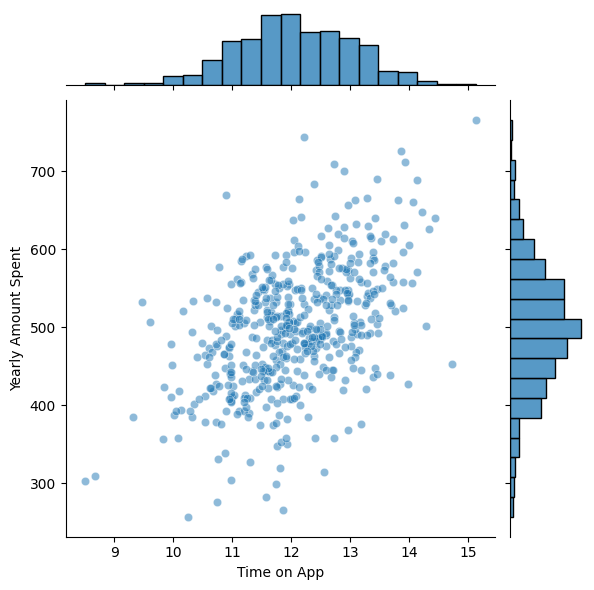

In [29]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df, alpha = 0.5)

In [ ]:
sns.pairplot(df, kind= "kde" )

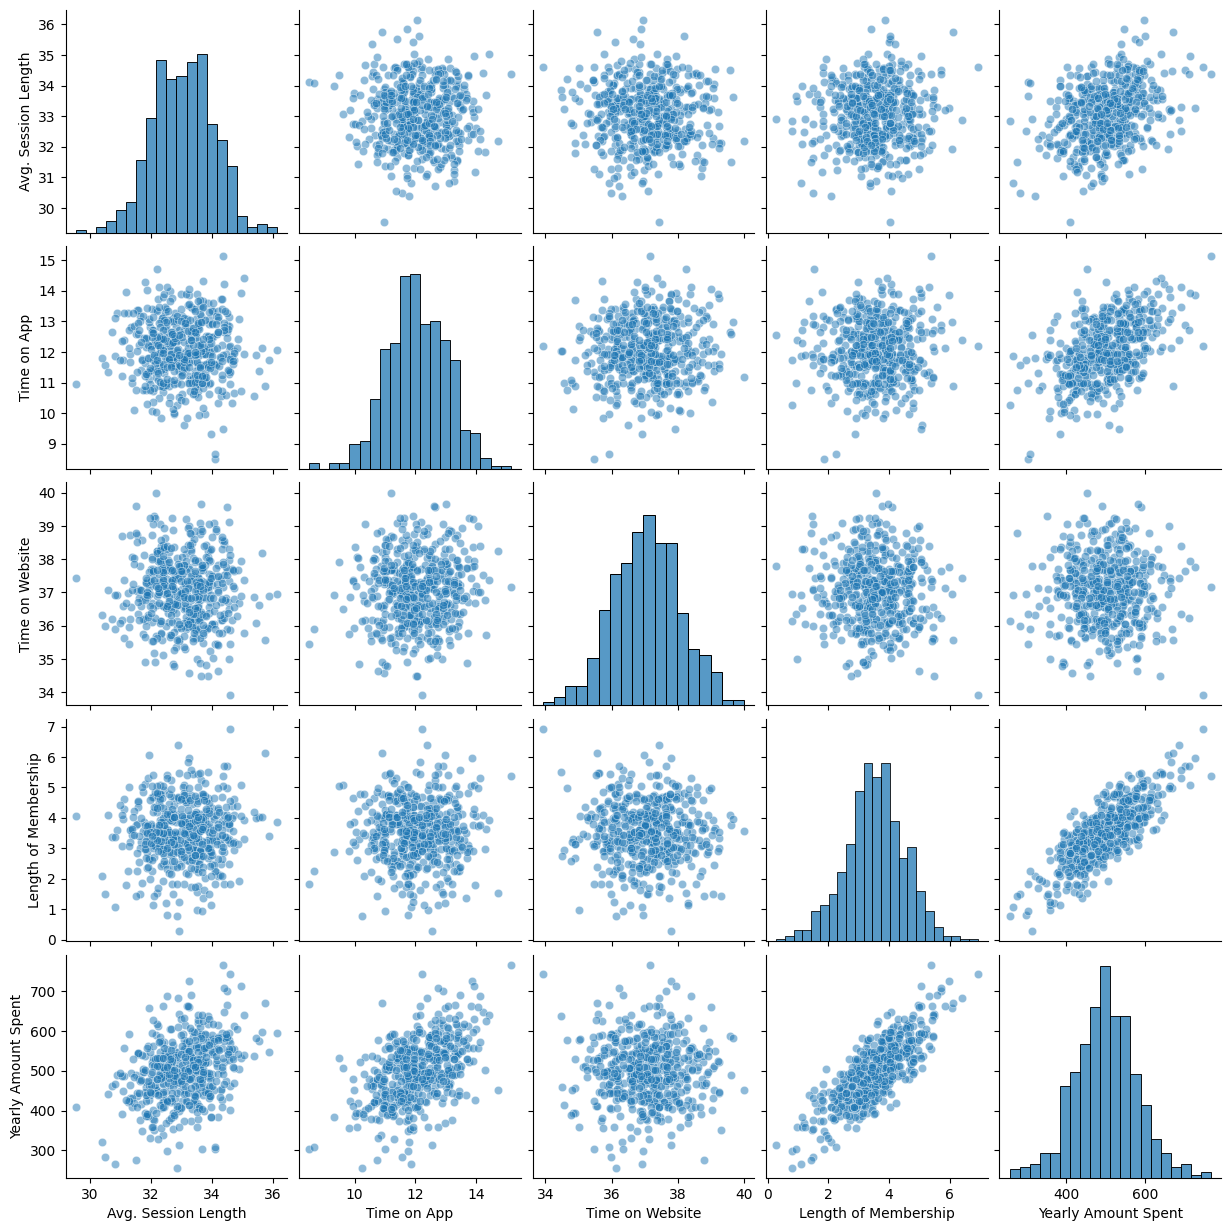

In [43]:
sns.pairplot(df, kind= "scatter", plot_kws={"alpha": 0.5} )

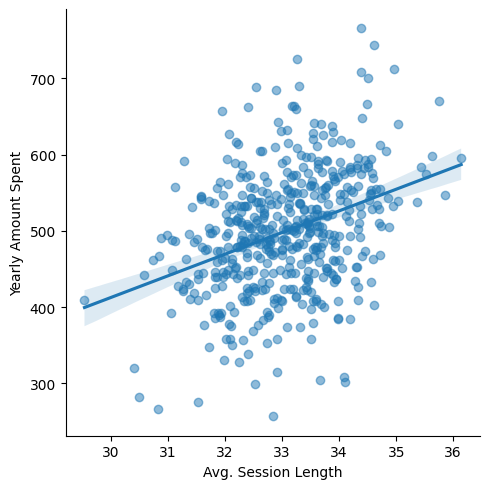

In [49]:
sns.lmplot(x='Avg. Session Length',
           y = 'Yearly Amount Spent',
           data = df, 
           scatter_kws={"alpha" : 0.5})

### Data Preparation
Before building the model, we need to prepare the data by splitting it into training and testing sets.

In [52]:
!pip install scikit-learn


     ---------------------------------------- 11.0/11.0 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 44.7/44.7 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 3.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from sklearn.model_selection import train_test_split

In [69]:
X = df[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [70]:
print ('The shape of X is:', X.shape)
print ('The shape of Y is: ', y.shape)
print ('Number of training examples (m):', len(X))

The shape of X is: (500, 4)
The shape of Y is:  (500,)
Number of training examples (m): 500


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 16)

### Building the Linear Regression Model
We build a Linear Regression model to predict the yearly amount spent by customers.

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [79]:
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
lr.coef_

array([25.71368662, 38.6252753 ,  0.40727535, 61.56942462])

In [85]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns = ['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.713687
Time on App           38.625275
Time on Website        0.407275
Length of Membership  61.569425


### Model Evaluation
We evaluate the model's performance by making predictions on the test set and calculating error metrics.

In [87]:
predictions = lr.predict(X_test)
predictions

array([576.88794424, 456.64248213, 520.49561403, 381.33037035,
       498.53983915, 495.55782491, 479.00834214, 478.61285894,
       520.98338901, 375.72135211, 469.16342625, 448.65678641,
       482.42998638, 528.64523556, 543.93896055, 517.09974131,
       475.46128085, 450.03566986, 535.22291266, 514.36490305,
       435.98171366, 457.65392302, 543.56586292, 482.51433441,
       467.63271983, 443.56775537, 314.74181988, 380.62393621,
       402.8563982 , 444.28283618, 496.28248657, 535.22187002,
       425.31680808, 372.40742679, 338.13134317, 306.2519193 ,
       501.05091502, 511.63488058, 481.90734434, 434.81899491,
       608.58977336, 411.81883714, 526.29280312, 569.88651667,
       380.88861705, 519.01861621, 682.33133591, 610.04481962,
       518.52703527, 457.85007861, 512.48277658, 531.67447198,
       530.77803639, 628.18988374, 752.96594035, 562.61949878,
       518.78423904, 473.60577205, 518.838041  , 531.07101526,
       484.98747241, 634.7897612 , 479.84155612, 440.31

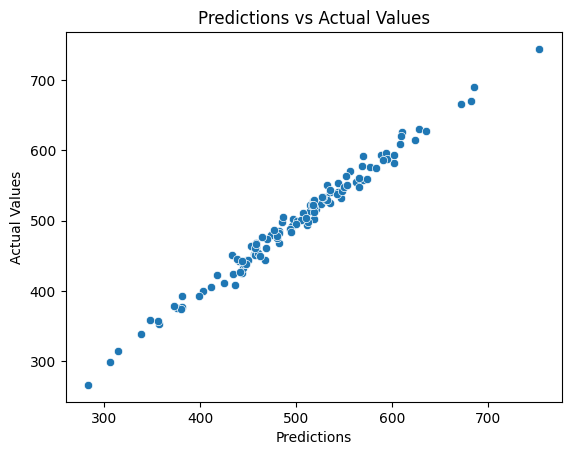

In [91]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Predictions vs Actual Values")
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [94]:
print("Mean Absolute Error:  ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:  ", mean_squared_error(y_test, predictions))
print("RMSE:   ", math.sqrt(mean_squared_error(y_test, predictions)))


Mean Absolute Error:   7.704328942908017
Mean Squared Error:   90.59287267071201
RMSE:    9.518028822750644


### Residual Analysis
Analyzing the residuals to check the assumptions of the Linear Regression model.

In [96]:
residuals = y_test - predictions
residuals

343    -0.862700
18     -4.326807
370     0.745166
237    -4.993470
304    -3.852683
         ...    
191    12.277204
316     7.980252
156    -4.787974
88    -18.243048
172    -5.790019
Name: Yearly Amount Spent, Length: 125, dtype: float64

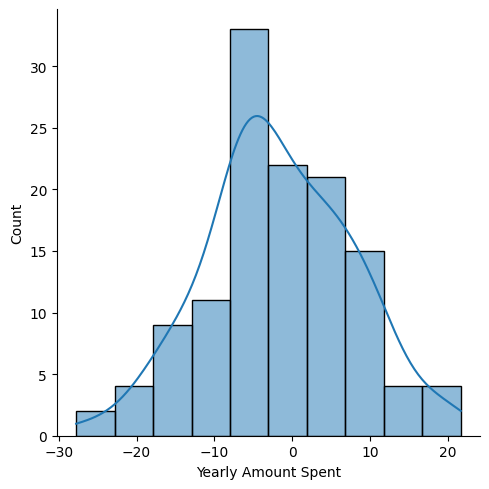

In [101]:
sns.displot(residuals, bins=10, kde=True)

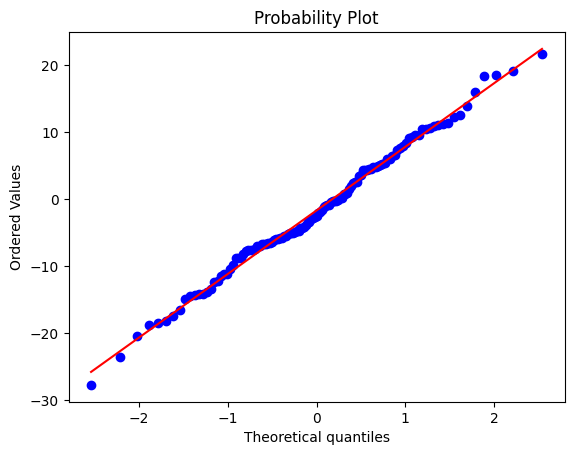

In [103]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## Conclusion
In this project, we successfully built a Linear Regression model to predict the yearly amount spent by customers based on various features. The model was evaluated using error metrics and visualizations. Residual analysis was performed to validate the model assumptions. This model can be used by businesses to better understand customer spending behavior and optimize their marketing strategies.